<a href="https://colab.research.google.com/github/dniggl/Insights/blob/main/Web_Scraping_Top_Movies_Gross_Earnings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scrape movies top earnings webpage, extract some data and create a data frame. 

**Install the Packages and Libraries** 

In [ ]:
# Install the packages.
!pip install selenium 

In [2]:
# Import the required libraries.
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import pandas as pd

**Install the Web Driver**

In [ ]:
# Install the chrome web driver from selenium. 
!apt-get update 
!apt install chromium-chromedriver

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

The web driver is a key component of selenium. The web driver is a browser automation framework that works with open source APIs. The framework operates by accepting commands, sending those commands to a browser, and interacting with applications.

Selenium supports multiple web browsers and offers web drivers for each browser. I have imported the chrome web driver from selenium. Alternatively, you can download the web driver for your specific browser and store it in a location where it can be easily accessed (C:\users\webdriver\chromedriver.exe). You can download a web driver for your browser at this site https://selenium-python.readthedocs.io/installation.html#:~:text=Selenium%20requires%20a-,driver,-to%20interface%20with  

**Review the Web Page's HTML Structure**

We need to understand the structure and contents of the HTML tags within the web page. For this project, we will be using the Box Office Mojo website that contains the top 200 highest-grossing movies (shown below). You can find this webpage by selecting this link https://www.boxofficemojo.com/chart/top_lifetime_gross/?area=XWW  

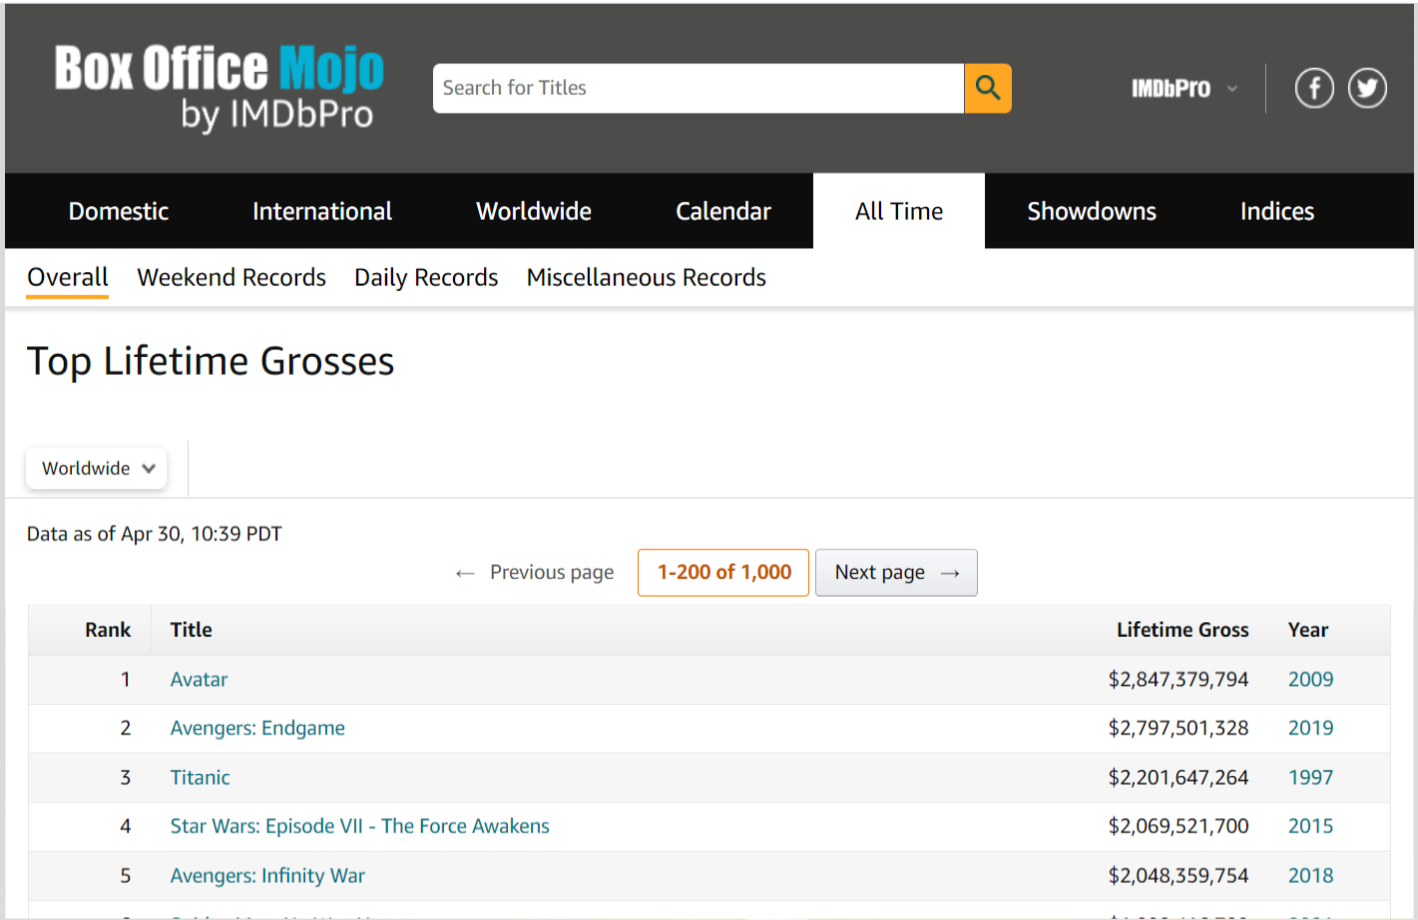







We can scrape this webpage by parsing the HTML of the page and extracting the information needed for our dataset. To scrape some data from this web page right click anywhere on the web page, click the arrow icon on the upper left-hand side of the screen with the HTML and then click the Title name (Avatar) on the first line of the webpage. This will result in the following screen being displayed.

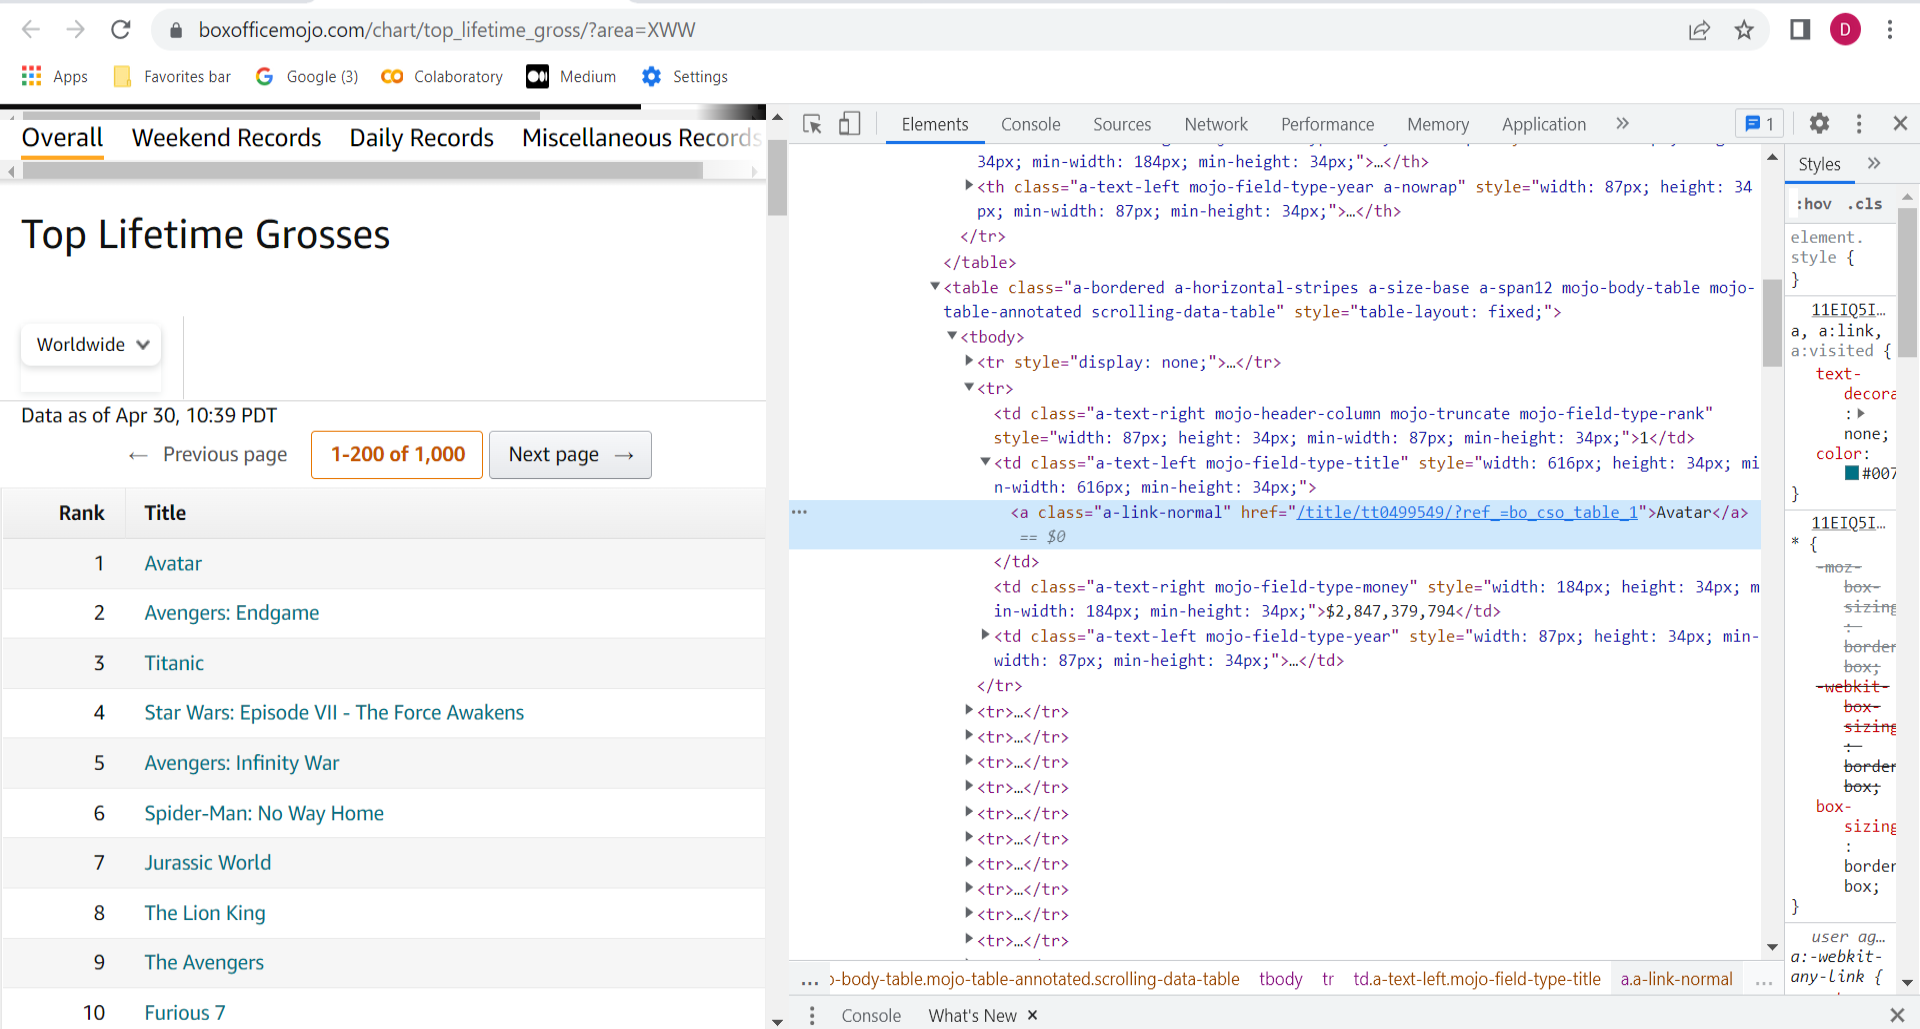

On the HTML screen, you will see highlighted the HTML line for the titles name Avatar (shown below).

In [ ]:
<a class="a-link-normal" href="/title/tt0499549/?ref_=bo_cso_table_1">Avatar</a>

The <a is referred to as the tag and the class is "a-link-normal". Avatar is the name of the movie that we want to extract.

If you move up one line from this tag you will find the tag td with a class of "a-text-left mojo-field-type-title" (shown below). This is the parent of the <a tag with class "a-link-normal".

In [ ]:
<td class="a-text-left mojo-field-type-title" style="width: 616px; height: 34px; min-width: 616px; min-height: 34px;">

So, if you wanted to find, extract and capture all the movie title names on the web page you would do the following steps.

1. Find all the HTML lines for a specific parent (td tag with class of "a-text-left mojo-field-type-title"). 

2. Find all the HTML lines for (a tag with class of "a-link-normal") within the parent in step 1.

2. Extract the data elements and build a list containing the movie title names. 

The code for finding, extracting and capturing movie title names is shown below. I will explain this code in detail in the next section.

In [ ]:
movies_names = driver.find_elements_by_xpath('//td[@class="a-text-left mojo-field-type-title"]/a[@class="a-link-normal"]') 

movie_name_list = [] 
for movie in range(len(movies_names)):
    movie_name_list.append(movies_names[movie].text)


We will find, extract and store the other data elements on the web page following a similar procedure.

**Overview of Selenium**

The HTML content of the webpages will be parsed and scraped using Selenium.  Selenium is a python library that can scrape data on websites dynamically. It can also be used for web automation & testing. Scraping data from the web is only a small part of the selenium library. Some of the features of Selenium include: 


*   Multi-Browser Compatibility
*   Multiple Language Support
*   Handling of Dynamic Web Elements
*   Easy to Identify Web Elements
*   Speed and Performance
*   Open Source and Portable

To learn more about Selenium select this link https://selenium-python.readthedocs.io/ 

Selenium web driver offers a variety of locater functions to locate elements on the web page. For this project, we will be locating data elements using the  XPath funcion. XPath is a language used for locating data values within HTML  tags and attributes like class, id and name.

The syntax for the XPath function is shown below. 

In [ ]:
Xpath = //tagname[@Attribute='Value']
//       ➡ Select Current Node
tagname  ➡ Tagname like div, td, tr
@        ➡ Selects attribute
Attribute➡ Attribute name (class,id,name,etc)
value    ➡ value of the attribute

# Let's look at some examples.
# This will return the HTML with tag div and class movie in a list.
Xpath = //div[@class='movie']

# This will return all the links with class drama inside the div tag that has a class of movie.
Xpath = //div[@class='movie']/a[@class='drama']

# HTML looks like this
HTML
<div class='movie'>
    <a class='drama' href='IMDB.com'> IMDB</a>
</div>

For this project we will be using the Box Office Mojo website that contains the top 200 highest-grossing movies. You can find this webpage by selecting this link https://www.boxofficemojo.com/chart/top_lifetime_gross/?area=XWW

After reviewing the Box Office Mojo webpage, I have decided to extract the following data elements for each movie. 

*   Rank 
*   Title
*   Lifetime Gross
*   Year

**Find and Extract the Data Elements**

For each of the data elements we want to extract, we will find all the HTML lines that are within a specific tag and class. We will then extract the data elements and store the data in a list. 

The get command launches the browser and opens the specified URL in your web driver.

In [4]:
driver.get('https://www.boxofficemojo.com/chart/top_lifetime_gross/?area=XWW')

Find, extract and capture movie rankings in a list.

In [34]:
# Extract movie rankings.
movies_rankings = driver.find_elements(By.XPATH, "(//td[@class='a-text-right mojo-header-column mojo-truncate mojo-field-type-rank'])")
movie_rank_list = [] 
for movie in range(len(movies_rankings)):
    movie_rank_list.append(movies_rankings[movie].text)

Find, extract and capture movie names in a list.

In [37]:
# Extract movie names.
movies_names = driver.find_elements(By.XPATH, "(//td[@class='a-text-left mojo-field-type-title']/a[@class='a-link-normal'])") 
movie_name_list = [] 
for movie in range(len(movies_names)):
    movie_name_list.append(movies_names[movie].text)

Find, extract and capture movie release years in a list.

In [39]:
# Extract release years.
release_year = driver.find_elements(By.XPATH, "(//td[@class='a-text-left mojo-field-type-year']/a[@class='a-link-normal'])")
release_year_list = []
for year in range(len(release_year)):
    release_year_list.append(release_year[year].text)

Find, extract and capture lifetime gross earnings in a list.

In [41]:
# Extract lifetime gross earnings.
lifetime_gross = driver.find_elements(By.XPATH, "(//td[@class='a-text-right mojo-field-type-money'])")
lifetime_gross_list = []
for i in range(len(lifetime_gross)):
    lifetime_gross_list.append(lifetime_gross[i].text)



**Create and Display the Data Frame**

In [44]:
# Combine the lists.
data =list( zip(movie_rank_list, movie_name_list, release_year_list, lifetime_gross_list))

In [45]:
# Create the data frame.
df = pd.DataFrame(data,columns=['Rank', 'Movie Name', 'Release Date','Lifetime Earnings'])

Print the new data frame.

In [46]:
df.head(10)

,Rank,Movie Name,Release Date,Lifetime Earnings
0,1,Avatar,2009,"$2,847,379,794"
1,2,Avengers: Endgame,2019,"$2,797,501,328"
2,3,Titanic,1997,"$2,201,647,264"
3,4,Star Wars: Episode VII - The Force Awakens,2015,"$2,069,521,700"
4,5,Avengers: Infinity War,2018,"$2,048,359,754"
5,6,Spider-Man: No Way Home,2021,"$1,892,599,679"
6,7,Jurassic World,2015,"$1,671,537,444"
7,8,The Lion King,2019,"$1,662,899,439"
8,9,The Avengers,2012,"$1,518,815,515"
9,10,Furious 7,2015,"$1,515,341,399"



**Convert Data Frame to a CSV File**

If needed, we can create a csv file from the data frame that was created in the previous step. 

In [47]:
df.to_csv('top_200_movies_with_lifetime_gross.csv',index=False)
reviews = pd.read_csv('top_200_movies_with_lifetime_gross.csv', lineterminator='\n') 
reviews

,Rank,Movie Name,Release Date,Lifetime Earnings
0,1,Avatar,2009,"$2,847,379,794"
1,2,Avengers: Endgame,2019,"$2,797,501,328"
2,3,Titanic,1997,"$2,201,647,264"
3,4,Star Wars: Episode VII - The Force Awakens,2015,"$2,069,521,700"
4,5,Avengers: Infinity War,2018,"$2,048,359,754"
...,...,...,...,...
195,196,Sherlock Holmes: A Game of Shadows,2011,"$543,848,418"
196,197,Despicable Me,2010,"$543,157,985"
197,198,Cinderella,2015,"$542,358,331"
198,199,Madagascar,2005,"$542,063,846"
